# Étape 1 : Concepts de base

## 1. Question conceptuelle

> Expliquez en une phrase ce qu'est un perceptron.

Un perceptron est un modèle de neurone artificiel qui effectue une classification binaire en combinant linéairement des entrées pondérées, puis en appliquant une fonction d'activation pour produire une sortie.

## 2. Exercice manuel

> Une donnée `X = [2, 3]`, un vecteur de poids `w = [0.5, 1.5]` et un biais `b = -2` sont donnés. Calculez la sortie du perceptron avec une fonction sigmoïde.
```
z = w(T)X + b
y(pred) = a(z)
```
Que se passe-t-il si vous augmentez le biais b ? Essayez avec `b = 0` et `b = 2`.

La formule donnée est : `z = w(T)X + b`
Avec `w = [0.5, 1.5]`, `X = [2, 3]` et `b = -2`, nous avons :

`z = (0.5 \* 2) + (1.5 \* 3) + (-2)`

`z = 1 + 4.5 - 2`

`z = 3.5`

La fonction sigmoïde est définie comme :

`a(z) = 1 / 1 + e^(-z)`

En remplançant `z = 3.5`, nous obtenons :

`a(3.5) = 1 / 1 + e^(-3.5)`

Le résultat numérique est environ :

`a(3.5) = 0.9707`

L'effet de l'augmentation du biais `b` dans le cas où `b = 0` :

`z = 5.5`
`a(5.5) = 0.9959`

L'effet de l'augmentation du biais `b` dans le cas où `b = 2` :

`z = 7.5`
`a(7.5) = 0.9994`

Lorsque le biais `b` augmente, `z` augmente également, ce qui pousse la sortie du perceptron `y(pred)` plus près de 1 (la saturation de la sigmoïde).
A l'inverse, diminuer `b` entraîne une sortie proche de 0. Le biais contrôle donc la tendance du perceptron à activer ou non une sortie.

# Étape 2 : Génération et visualisation des données

> 1. Générer des données linéairement séparables avec make_blobs.

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.5)

> 2. Affichez ces données avec matplotlib.

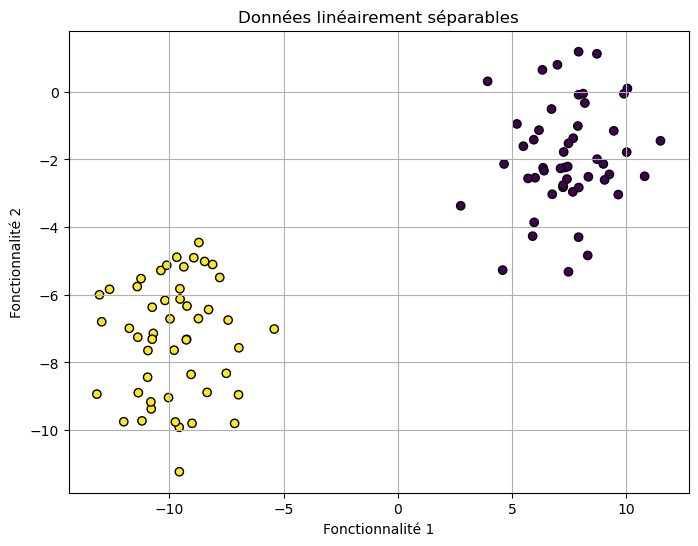

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Fonctionnalité 1')
plt.ylabel('Fonctionnalité 2')
plt.title('Données linéairement séparables')
plt.grid(True)
plt.show()

> Combien de points appartiennent à chaque classe ?

In [3]:
class_0 = sum(1 for label in y if label == 0)
class_1 = sum(1 for label in y if label == 1)

print(f"Nombre de points dans la classe 0 : {class_0}")
print(f"Nombre de points dans la classe 1 : {class_1}")

Nombre de points dans la classe 0 : 50
Nombre de points dans la classe 1 : 50


> Pensez-vous que le perceptron peut séparer ces données ?

Oui, le perceptron peut séparer ces données si elles sont linéairement séparables, ce qui semble être le cas ici, étant donné que nous avons utilisé des paramètres de génération qui favorisent cette séparation (clusters bien définis avec une faible dispersion relative grâce à `cluster_std=1.5`).

# Étape 3 : Implémentation de la fonction sigmoïde

> 1. Implémentez la fonction sigmoïde :

In [4]:
import math

def sigmoid(z):
  return 1 / (1 + math.exp(-z))

> 2. Testez-la avec une série de valeurs de z.

In [5]:
z_values = [-5, -2, 0, 2, 5]
sigmoid_results = [(z, sigmoid(z)) for z in z_values]

sigmoid_results

[(-5, 0.0066928509242848554),
 (-2, 0.11920292202211755),
 (0, 0.5),
 (2, 0.8807970779778823),
 (5, 0.9933071490757153)]

> Quelle est la sortie pour z = 0 ? Pourquoi ?

Pour `z = 0`, la sortie de la fonction sigmoïde est :

`sigmoid(0) = 1/1+e^(-0)`

`sigmoid(0) = 1/1+1 = 1/2 = 0.5`

> Tracez la courbe de la sigmoïde pour z entre -10 et 10. Que remarquez
vous ?

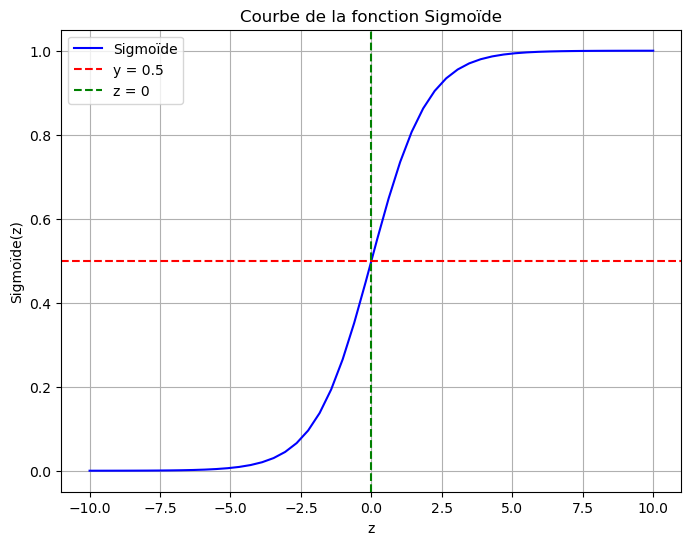

In [6]:
import numpy as np

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10)
sigmoid_results = sigmoid(z_values)

plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_results, label='Sigmoïde', color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label='y = 0.5')
plt.axvline(x=0, color='green', linestyle='--', label='z = 0')
plt.title('Courbe de la fonction Sigmoïde')
plt.xlabel('z')
plt.ylabel('Sigmoïde(z)')
plt.legend()
plt.grid(True)
plt.show()

Le sigmoïde est idéale pour convertir une valeur scalaire en une probabilité, mais elle est limitée par se valeurs extrêmes qui tendent à saturer à 0 ou 1.

# Étape 4 : Fonction coût

> 1. Implémentez la fonction coût logistique binaire :

In [7]:
def cost_function(y, y_pred):
  epsilon = 1e-15

  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
  cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

  return cost

> 2. Testez-la avec
`y = [1, 0, 1, 0]` et `y(pred) =[0.9, 0.1, 0.8, 0.2].` :

In [8]:
y_og = np.array([1, 0, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.2])

cost = cost_function(y_og, y_pred)
cost

0.164252033486018

> Que se passe-t-il si les prédictions `y(pred)` sont proches des étiquettes `y` ? Et
si elles sont très éloignées ?

Cela montre que les prédictions sont assez proches des étiqquettes rééelles, ce qui correspond à un faible coût.

# Étape 5 : Descente de gradient

> 1. Implémentez une étape de la descente de gradient. Utilisez les formules pour
mettre à jour `w` et `b`.

In [9]:
def gradient_descent_step(X, y, w, b, alpha):
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)

    w -= dw * alpha
    b -= db * alpha

    return w, b

> Qu'arrive-t-il aux poids si le taux d'apprentissage `α` est trop grand ?                             
Essayez `α` = 0.1, 1, et 10.

In [10]:
results = {}
initial_b = -2
initial_w = np.zeros(X.shape[1])

for alpha in [0.1, 1, 10]:
  w, b = initial_w.copy(), initial_b
  w, b = gradient_descent_step(X, y, w, b, alpha)

  results[alpha] = (w, b)

results

{0.1: (array([-0.47556584, -0.30947906]), -1.9619202922022119),
 1: (array([-4.75565837, -3.09479059]), -1.6192029220221178),
 10: (array([-47.55658367, -30.94790593]), 1.807970779778823)}

# Étape 6 : Entraînement du perceptron

> 1. Implémentez une boucle complète d’entraînement pour optimiser les poids et
biais sur plusieurs itérations.

In [11]:
def train_model(X, y, w, b, alpha, num_iterations):
  costs = []

  for i in range(num_iterations):
    w, b = gradient_descent_step(X, y, w, b, alpha)

    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    cost = cost_function(y, y_pred)
    costs.append(cost)

  return w, b, costs

w_opt, b_opt, costs = train_model(X, y, initial_w, initial_b, 0.1, 100)

print(f"Poids optimisés : {w_opt}")
print(f"Biais optimisé : {b_opt}")

Poids optimisés : [-0.74085344 -0.32272285]
Biais optimisé : -1.9747532251708997


> Après combien d’itérations le coût commence-t-il à se stabiliser ? Pourquoi ?

In [12]:
def find_stabilization_point(costs, threshold=1e-4):
    for i in range(1, len(costs)):
        if abs(costs[i] - costs[i - 1]) < threshold:
            return i
    return len(costs)

stabilization_point = find_stabilization_point(costs)

print(f"Point de stabilité : {stabilization_point} itérations")

Point de stabilité : 27 itérations


# Étape 7 : Évaluation

> 1. Implémentez une fonction predict pour prédire les étiquettes.

In [13]:
def predict(X, w, b):
  z = np.dot(X, w) + b
  y_pred = sigmoid(z)
  y_pred = (y_pred >= 0.5).astype(int)

  return y_pred

> 2. Évaluez la précision sur le jeu de données.

In [14]:
output = predict(X, w_opt, b_opt)
output

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

> Votre perceptron est-il parfait ? Pourquoi pourrait-il échouer dans certains
cas ?

Non, un percerptron n'est pas parfait et peut éechouer dans certain cas.

> Comment pourriez-vous améliorer ce modèle ?

En combinant des modèles plus avancés (réseaux de neurones, SVM) avec un bon prétraitement des données, une régularisation et des optimisation modernes, il est possible d'améliorer considérablement la performance et la robustesse d'un modèle initial basé sur un perceptron.